In [82]:
#reading csv file as a dataframe
import pandas as pd
import numpy as np
df=pd.read_csv("time_estimate.csv",index_col='filename')
import math
import matplotlib.pyplot as plt

In [83]:
df=df.iloc[:,1:]
df.head()
df['volume']=df['volume'].astype(int)
df ['model_height']=df ['model_height'].astype(int)
df['model_radius']=df['model_radius'].astype(int)
df['infill']=df['infill'].astype(int)
df=df[(df['volume']>1)]
df=df [(df['model_height']>1)]
df=df [(df['model_radius']>1)]
df=df.drop(['infill','layer_height'],axis=1)
df=df.dropna()
df.head()

,volume,model_height,model_radius,est_time
filename,,,,
stls/1000042.stl,11271,5,26,31.0
stls/1000154.stl,5253,15,10,38.0
stls/1000195.stl,19228,10,24,63.0
stls/1000217.stl,22699,30,15,76.0
stls/1000293.stl,14374,18,15,64.0


In [84]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
print(x.head())
print(x.shape)
print(y.head())
print(y.shape)


                  volume  model_height  model_radius
filename                                            
stls/1000042.stl   11271             5            26
stls/1000154.stl    5253            15            10
stls/1000195.stl   19228            10            24
stls/1000217.stl   22699            30            15
stls/1000293.stl   14374            18            15
(25364, 3)
                  est_time
filename                  
stls/1000042.stl      31.0
stls/1000154.stl      38.0
stls/1000195.stl      63.0
stls/1000217.stl      76.0
stls/1000293.stl      64.0
(25364, 1)


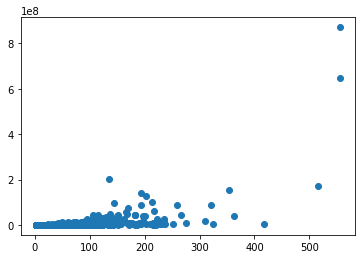

In [85]:
plt.scatter(df["model_radius"],df["volume"])

In [86]:
df.describe()

,volume,model_height,model_radius,est_time
count,2.536400e+04,25364.000000,25364.000000,25364.000000
mean,2.697059e+05,31.796838,19.701191,107.301293
std,7.497735e+06,61.999944,19.364985,172.979275
min,3.500000e+01,2.000000,2.000000,1.000000
25%,3.826500e+03,6.000000,10.000000,19.000000
50%,1.068900e+04,14.000000,15.000000,47.000000
75%,3.373975e+04,35.000000,23.000000,116.000000
max,8.713280e+08,3450.000000,556.000000,1440.000000


In [87]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x

,volume,model_height,model_radius
filename,,,
stls/1000042.stl,11271,5,26
stls/1000154.stl,5253,15,10
stls/1000195.stl,19228,10,24
stls/1000217.stl,22699,30,15
stls/1000293.stl,14374,18,15
...,...,...,...
stls/999798.stl,8879,10,16
stls/999836.stl,559,11,3
stls/999906.stl,353,9,3


In [88]:
# from sklearn.neural_network import MLPClassifier
# clf=MLPClassifier(solver='adam',alpha=1e-6,hidden_layer_sizes=(20,20),random_state=1,max_iter=1500)
# clf.fit(x_train,y_train)
# y_predicted=clf.predict(x_test)
# y_predicted

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=21,alpha=.1)
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
y_predicted

c:\users\mathew varghese\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([153.87698723,   8.91142526, 361.34570287, ...,  69.91034444,
        57.29125159, 288.40431786])

109.0 153.88
6.0 8.91
701.0 361.35
9.0 13.14
3.0 8.91
4.0 9.26
258.0 288.4
31.0 55.83
42.0 31.84
99.0 80.77
5.0 606.09
20.0 22.77
1194.0 765.61
20.0 20.75
15.0 15.34
252.0 719.58
13.0 15.78
26.0 22.77
62.0 137.89
115.0 117.64
21.0 22.77
57.0 76.05
107.0 100.73
11.0 12.49
63.0 114.71
36.0 36.55
328.0 387.28
79.0 104.55
444.0 476.72
103.0 83.07
42.0 37.02
767.0 724.05
37.0 39.65
21.0 53.4
32.0 36.33
176.0 123.44
96.0 108.52
18.0 17.49
9.0 8.91
49.0 53.39
10.0 12.25
6.0 8.91
74.0 60.29
17.0 19.14
771.0 661.65
23.0 22.04
26.0 22.21
123.0 121.41
110.0 124.13
112.0 139.5


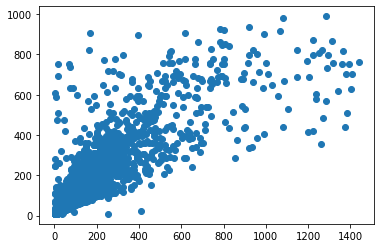

In [90]:
for i in range(0,50):
    
    print(y_test['est_time'][i], y_predicted[i].round(2))
plt.scatter(y_test['est_time'],y_predicted)

In [91]:
y_predicted=y_predicted.reshape(-1,1)
y_predicted.shape

(5073, 1)

In [92]:
# import warnings
# warnings.filterwarnings('ignore')

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import log_loss
# print('accuracy : ', accuracy_score(y_test,y_predicted))
# # print('log loss :',log_loss(y_test,clf.predict_proba(x_test)))
# print('cross val score :',cross_val_score(clf, x_test, y_test, cv=5).mean())

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


math.sqrt(mean_squared_error(y_test, y_predicted))
print(model.score(x_test,y_test))
cross_val_score(model,x,y,cv=5).mean()



0.7328581574562603


c:\users\mathew varghese\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mathew varghese\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mathew varghese\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\mathew varghese\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation

0.7111697076292464